#***Thyroid Cancer Prediction:***
#### ***Life Cycle:***
- Understanding the Problem Statement..
- Data Collection..
- Exploratory Data Analysis..
- Data Preprocessing..
- Model Training..
- Choose best model..

###***This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.***

### ***Problem Statment:***
- ***Developing accurate and efficient model for thyroid cancer has recurred to the patient or not...***

### ***Data Collection:***
- ***DataSet Source:*** https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence/data
- ***The DataSet contains 383 rows and 17 columns..***

### ***Importing the Required Libraries:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [3]:
df.columns = df.columns.str.replace(" ","_")

In [4]:
# Lets chcek some data set info:
def Info(df):
    print(f"Total rows and columns: {df.shape}\n")
    print(f"Columns are:{df.columns}\n")
    print("*"*170)

    # Lets chcek the dtype and non null values and null values:
    print("Info:\n ")
    print(f"{df.info()}\n\n")
    print(f"Null Values:\n{df.isnull().sum()}\n")
    print("*"*170)

    # Lets chcek the weather the data is imbalanced or not:
    print(f"Checking the Recurrance data is imbalanced or not:\n{df.Recurred.value_counts(normalize=True)*100}\n")

    # Alternate approach for checking imbalance data:
    class_Yes = np.round((df['Recurred'].value_counts()["Yes"]/df.shape[0])*100,2)
    class_No = np.round((df['Recurred'].value_counts()['No']/df.shape[0])*100,2)
    print(f"Percentage of Recurred occur means Yes: {class_Yes}\n")
    print(f"Percentage of Recurred did not occur means No: {class_No}\n")
    print("Here we have 2 options we can handled the imbalanced data set thorugh oversampling and under sampling and also we can use stratify")
Info(df)

Total rows and columns: (383, 17)

Columns are:Index(['Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx_Smoking            383 non-null    object
 4   Hx_Radiothreapy       383 non-null    object
 5   Thyroid_Function      383 non-null    object
 6   Physical_Examinatio

#*lets see the features and there unique categories:*

In [5]:
for i in df.columns:
  print(i,df[i].unique(),sep=": ")

Age: [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Gender: ['F' 'M']
Smoking: ['No' 'Yes']
Hx_Smoking: ['No' 'Yes']
Hx_Radiothreapy: ['No' 'Yes']
Thyroid_Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical_Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality: ['Uni-Focal' 'Multi-Focal']
Risk: ['Low' 'Intermediate' 'High']
T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N: ['N0' 'N1b' 'N1a']
M: ['M0' 'M1']
Stage: ['I' 'II' 'IVB' 'III' 'IVA']
Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
R

### ***Columns and there information wrt Recurrance:***

##### ***Recurrence:***
- *recurrance is nothing but the cancer should come back after initial treatment..*

### ***Patients Medical History:***
##### ***Hx Radiotherapy:***

- *'No' - Indicates the patient has no history of radiotherapy treatment.*
- *'Yes' - Indicates the patient has a history of radiotherapy treatment.*

#### ***Thyroid Function:***

- **'Euthyroid'** - Indicates normal thyroid function.
- **'Clinical Hyperthyroidism'** - Indicates overt hyperthyroidism.This can lead to symptoms such as weight loss, rapid heartbeat (tachycardia), tremors, anxiety, heat intolerance, and sweating. Common causes of clinical hyperthyroidism include Graves' disease, toxic multinodular goiter, and thyroid nodules that autonomously produce thyroid hormones.
- **'Clinical Hypothyroidism'** - Indicates overt hypothyroidism.This can lead to symptoms such as fatigue, weight gain, cold intolerance, constipation, dry skin, hair loss, and depression. Common causes of clinical hypothyroidism include autoimmune thyroiditis (Hashimoto's thyroiditis), thyroid surgery, radioactive iodine therapy, and certain medications.
- **'Subclinical Hyperthyroidism'** - Indicates mild hyperthyroidism.However, subclinical hyperthyroidism can still have adverse effects on the body, such as an increased risk of atrial fibrillation (an irregular heartbeat) and osteoporosis.
- **'Subclinical Hypothyroidism'** - Indicates mild hypothyroidism.However, subclinical hypothyroidism may still cause subtle symptoms such as fatigue, mild weight gain, and mild depression. It may also increase the risk of cardiovascular disease.

### ***Physical Examination:***

- Details the findings of physical examinations related to the thyroid gland.
- Specific physical characteristics may provide insight into potential recurrence risk.

### ***Adenopathy:***
- Indicates the presence and location of adenopathy (enlarged lymph nodes).
- Adenopathy can indicate cancer spread, which may affect recurrence likelihood.
- This variable indicates the presence or absence of adenopathy, which refers to enlarged lymph nodes. It includes categories such as 'No', 'Right', 'Extensive', 'Left', 'Bilateral', and 'Posterior', indicating the location and extent of adenopathy if present.

### ***Pathology:***
- Describes the type of thyroid cancer pathology.
- Different types of thyroid cancer may have distinct recurrence rates.
- This variable describes the pathology or type of thyroid cancer. It includes categories such as 'Micropapillary', 'Papillary', 'Follicular', and 'Hurthel cell', representing different histological subtypes of thyroid cancer.

### ***Focality:***
- Specifies whether the cancer is uni-focal or multi-focal.
- Multi-focality may increase the risk of recurrence compared to uni-focal tumors.

###***Risk:***
- Classifies the risk level associated with thyroid cancer.
- Higher-risk cancers may have a greater chance of recurrence.

###***Tumor (T):***
- Describes the primary tumor size and extension.
- Larger or more invasive tumors (higher T stage) may increase recurrence risk.

###***Node (N):***
- Indicates the involvement of lymph nodes.
- Presence of lymph node involvement (N1a or N1b) may increase recurrence risk.

###***Metastasis (M):***
- Indicates distant metastasis.
- Presence of metastasis (M1) typically increases the risk of recurrence.

###***Stage:***
- Represents the overall stage of thyroid cancer.
- Advanced stages (e.g., III, IVA, IVB) often correlate with higher recurrence rates.

###***Response:***
- Indicates the response to treatment.
- Poor treatment response may be associated with higher recurrence rates.


In [6]:
# most of we have categorical columns:
cat_col = df.select_dtypes(object)
cat_col.columns

Index(['Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

#*lets see the categorical columns distribution:*

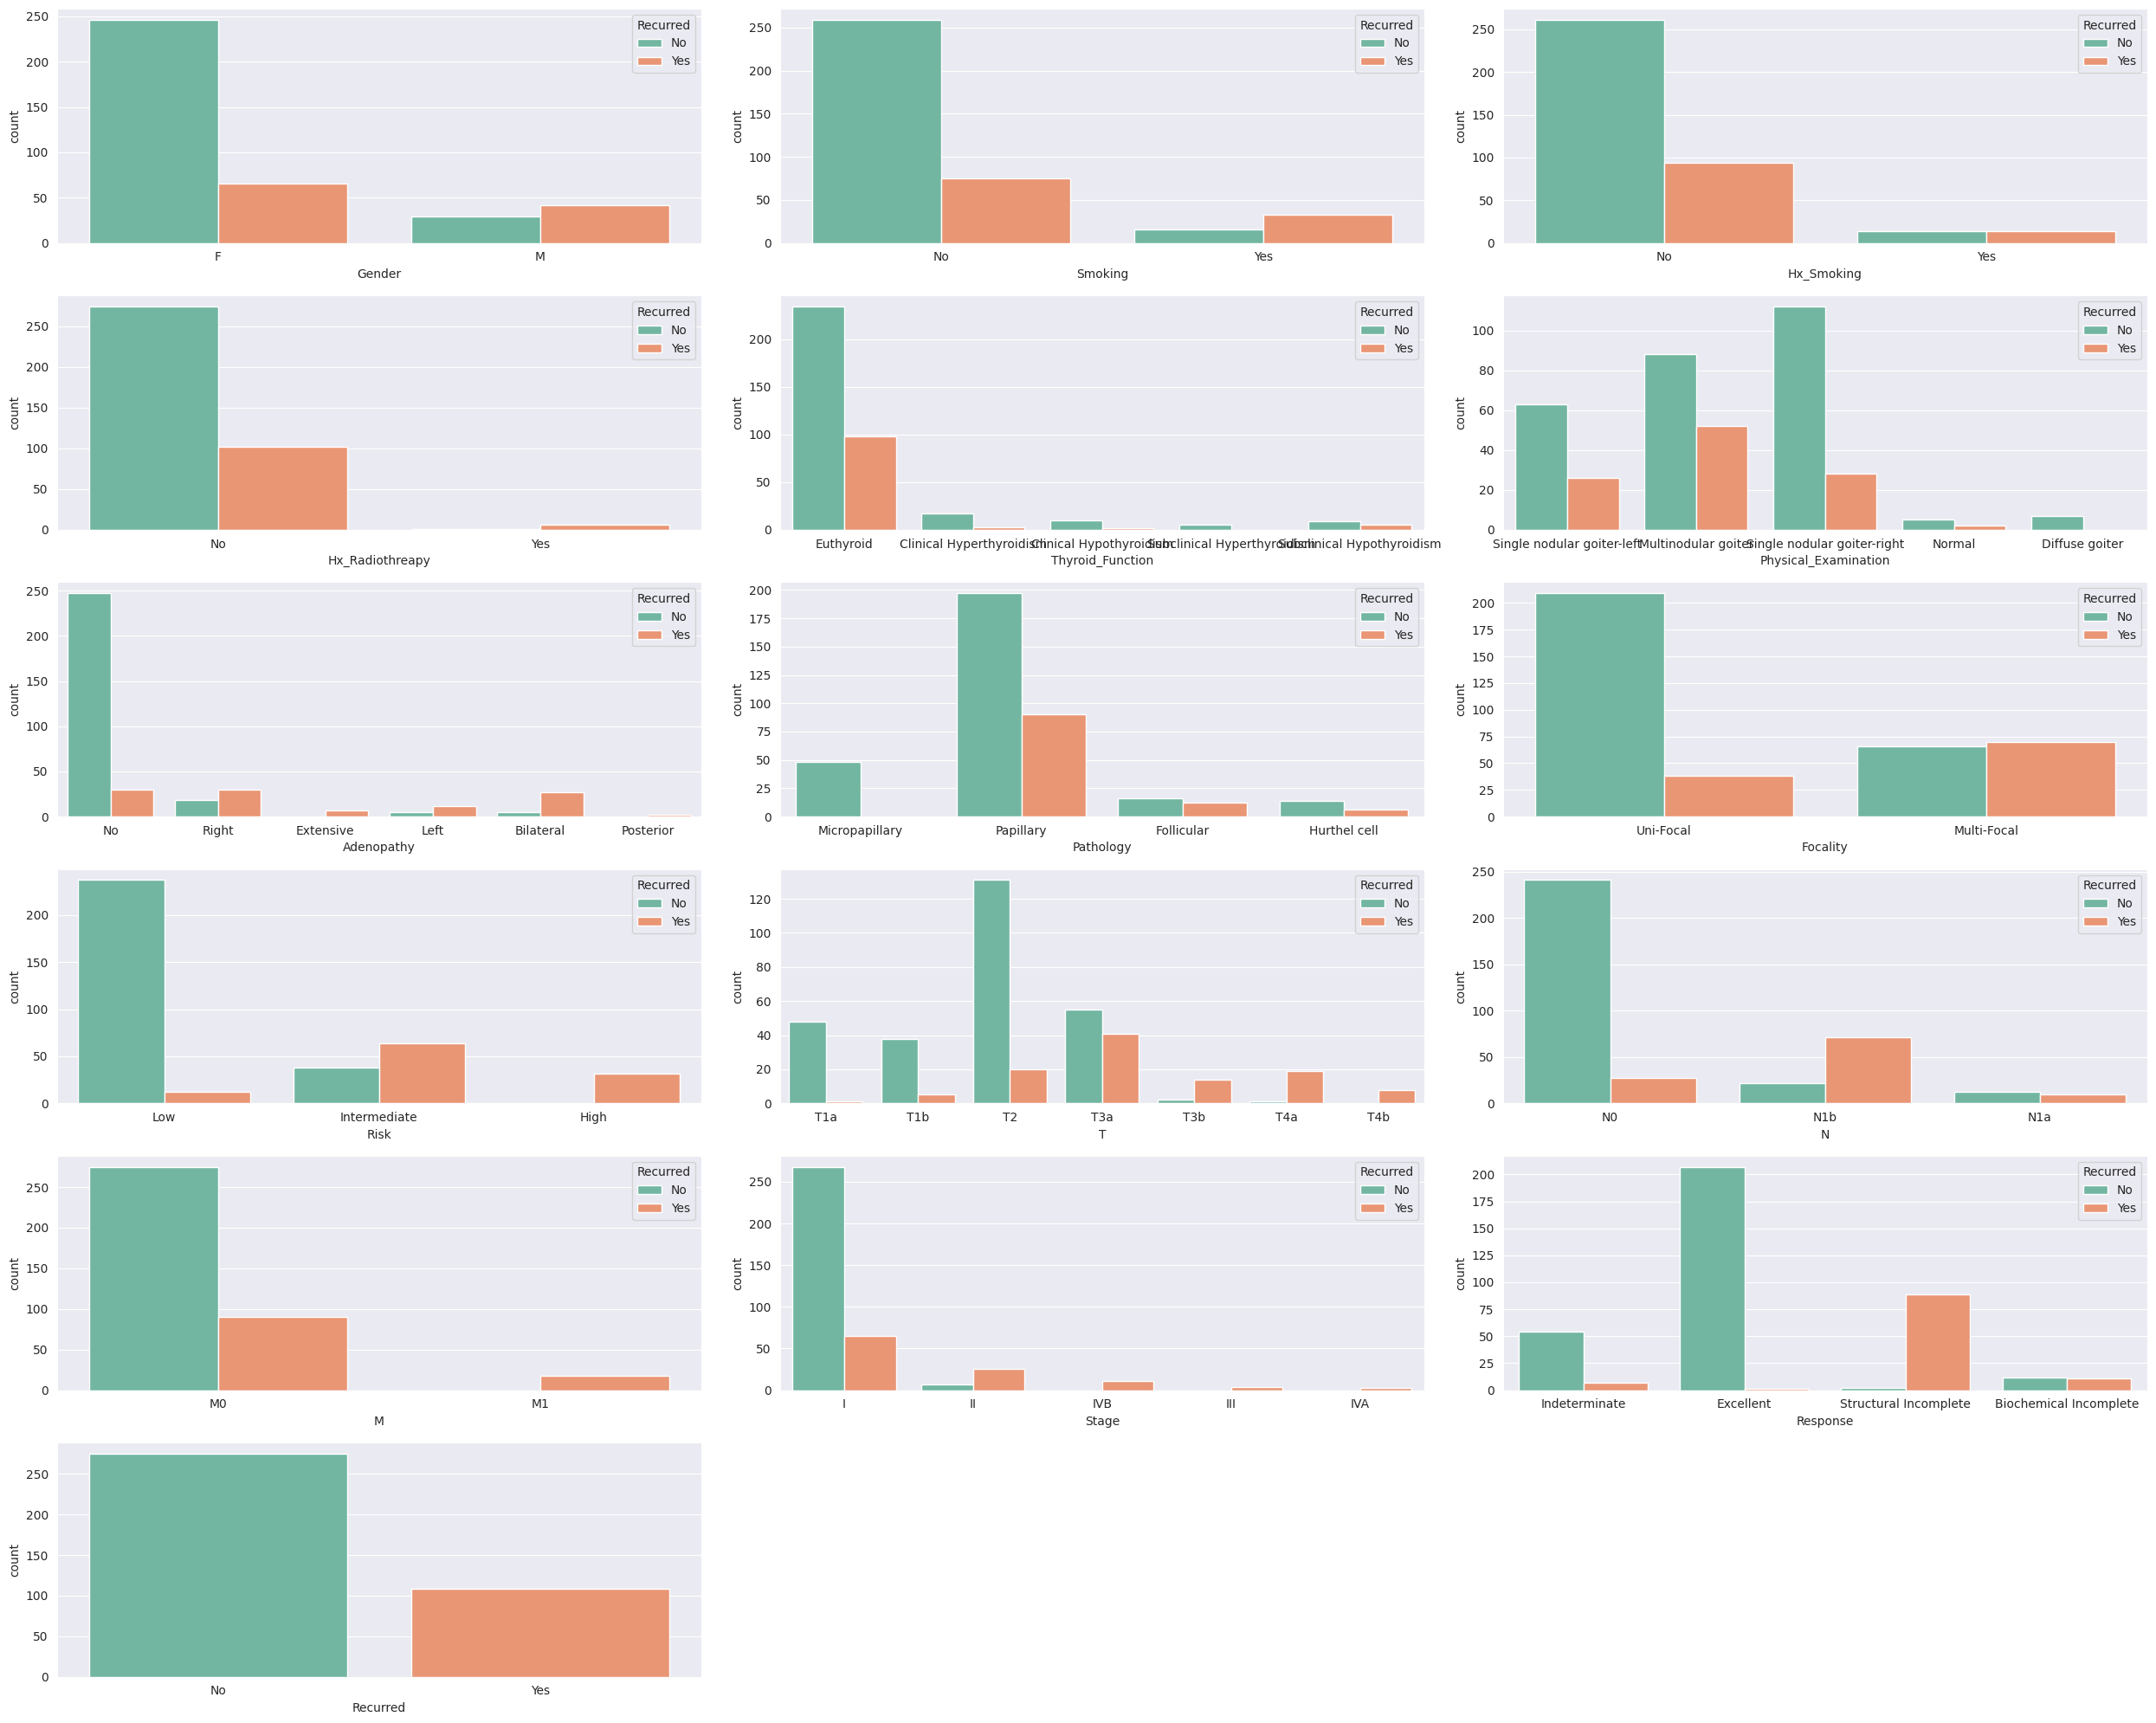

In [ ]:
plt.figure(figsize=(25,20))
sns.set_style("darkgrid")
sns.set_palette("Set2")
i = 1
for col in cat_col.columns:
  plt.subplot(6,3,i)
  bar = sns.countplot(data=df,x=col,hue="Recurred")
  i+=1
  plt.tight_layout()

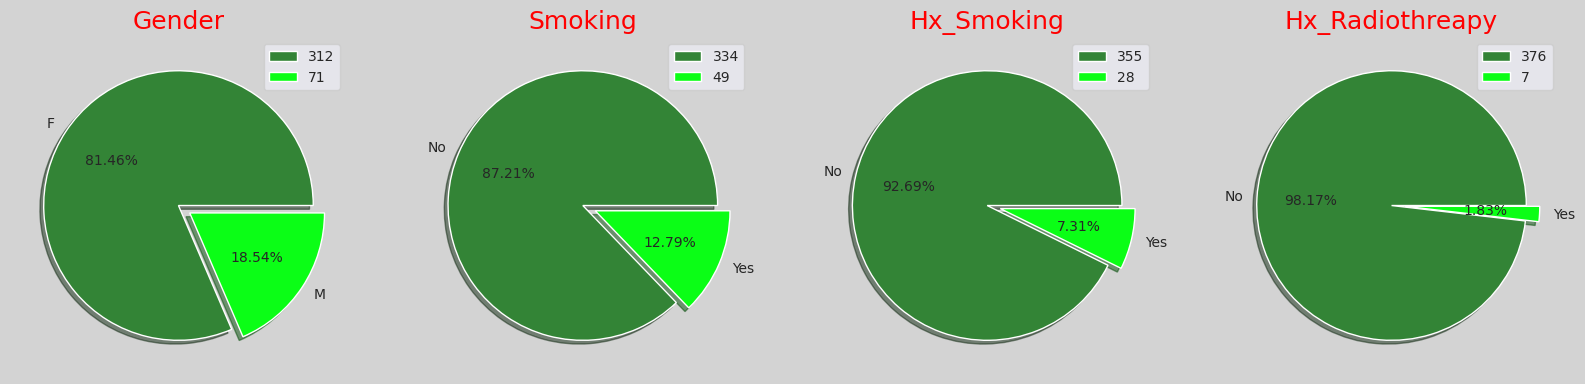

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(20,6),facecolor='lightgray')
for i,col in enumerate(cat_col.columns[:4]):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",explode=[0,0.1],colors=['#338436','#0BFE16'],labels=res.index,shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

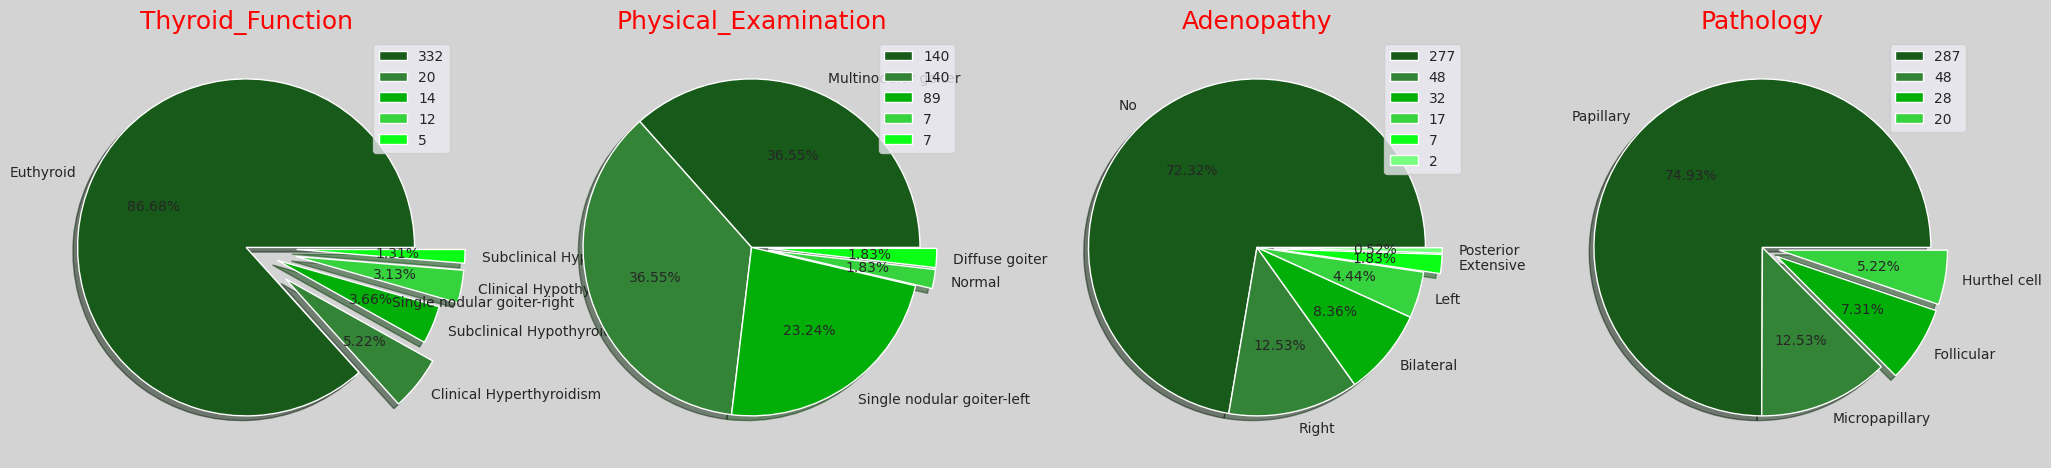

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(25,25),facecolor='lightgray')
colors=[('#175A19','#338436',"#02AF09","#37D33E","#0BFE16"),('#175A19','#338436',"#02AF09","#37D33E","#0BFE16"),('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F"),('#175A19','#338436',"#02AF09","#37D33E")]
explode = [(0,0.3,0.2,0.3,0.3),(0,0,0,0.1,0.1),(0,0,0,0,0.1,0.1),(0,0,0.1,0.1)]
for i,col in enumerate(cat_col.columns[4:8]):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",explode=explode[i],colors=colors[i],labels=res.index,shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

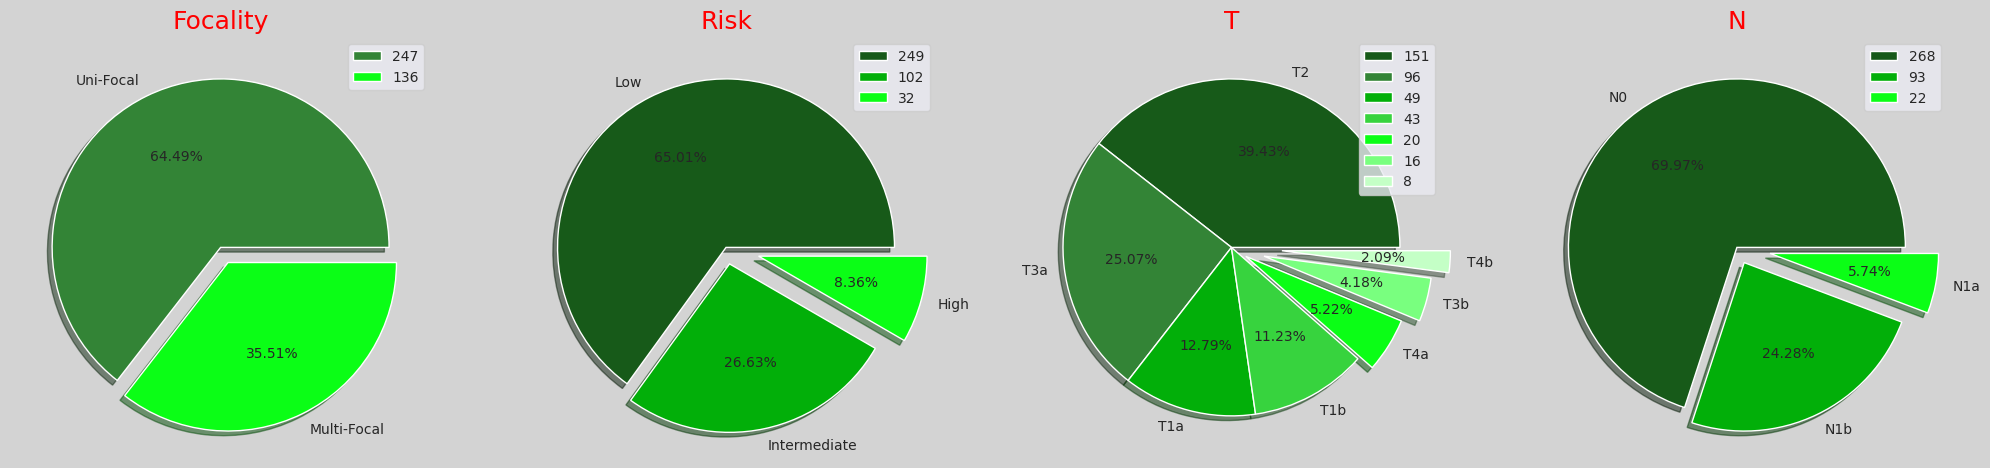

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(25,25),facecolor='lightgray')
colors=[('#338436','#0BFE16'),('#175A19',"#02AF09","#0BFE16"),('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F","#C4FFC6"),('#175A19',"#02AF09","#0BFE16")]
explode = [(0,0.1),(0,0.1,0.2),(0,0,0,0,0.1,0.2,0.3),(0,0.1,0.2)]
for i,col in enumerate(cat_col.columns[8:12]):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",explode=explode[i],colors=colors[i],labels=res.index,shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

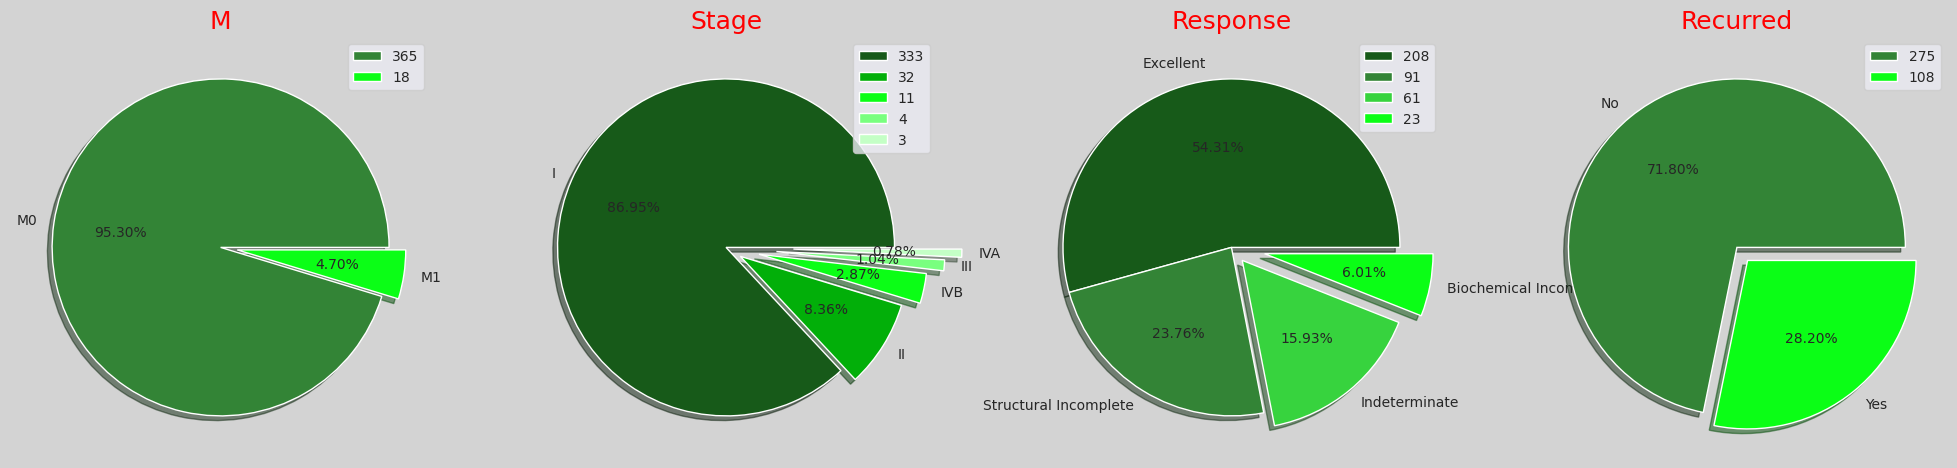

In [ ]:
fig,axs = plt.subplots(1,4,figsize=(25,25),facecolor='lightgray')
colors=[('#338436','#0BFE16'),('#175A19',"#02AF09","#0BFE16","#79FF7F","#C4FFC6"),('#175A19','#338436',"#37D33E","#0BFE16"),('#338436','#0BFE16')]
explode = [(0,0.1),(0,0.1,0.2,0.3,0.4),(0,0,0.1,0.2),(0,0.1)]
for i,col in enumerate(cat_col.columns[12:16]):
  ax = axs[i]
  res = cat_col[col].value_counts()
  ax.pie(res,autopct="%.2f%%",explode=explode[i],colors=colors[i],labels=res.index,shadow=True)
  ax.legend(res.values)
  ax.set_title(col,color="red",size=18)

#*lets import the libraries:*

In [7]:
# data splitting,cross validation,hyperparameter tuning
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV

# for preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder

# for encoding purpose
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

# for data balancing
from imblearn.over_sampling import SMOTE

# modeling purpose
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

# for deep learning models
import keras
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# for performance metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score


# for building pipeline and column tranformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

#*Lets do encoding:*

In [8]:
# in this dataset we have nominal and oridnal categorical data so accpridng to that we need to do encoding..
ordinal_features = df[['Focality','Risk','T','N','M','Stage','Response']] # in thes featuer we get there is certain kind of order in between categories..

nominal_features = df.drop(columns=ordinal_features.columns)

In [9]:
nominal_features.drop(columns=['Recurred'],inplace=True)

In [10]:
nominal_features.drop(columns=['Age'],inplace=True)

In [11]:
encoded_nominal_features = pd.get_dummies(df[nominal_features.columns],drop_first=True)
encoded_nominal_features[:2]

,Gender_M,Smoking_Yes,Hx_Smoking_Yes,Hx_Radiothreapy_Yes,Thyroid_Function_Clinical Hypothyroidism,Thyroid_Function_Euthyroid,Thyroid_Function_Subclinical Hyperthyroidism,Thyroid_Function_Subclinical Hypothyroidism,Physical_Examination_Multinodular goiter,Physical_Examination_Normal,Physical_Examination_Single nodular goiter-left,Physical_Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [12]:
oe = OrdinalEncoder()

encoder_ordinal_features = oe.fit_transform(df[ordinal_features.columns])

In [13]:
encoder_ordinal_features

array([[1., 2., 0., ..., 0., 0., 2.],
       [1., 2., 0., ..., 0., 0., 1.],
       [1., 2., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 6., ..., 1., 4., 3.],
       [0., 0., 6., ..., 0., 3., 3.],
       [0., 0., 6., ..., 0., 3., 3.]])

In [14]:
encoded_ordinal_features = pd.DataFrame(encoder_ordinal_features,columns=ordinal_features.columns)

In [15]:
# lets concat the nominal and oridnal features...
encoded_oridnal_features=encoded_ordinal_features.astype(int)

In [16]:
encoded_ordinal_features[:2]

,Focality,Risk,T,N,M,Stage,Response
0,1.0,2.0,0.0,0.0,0.0,0.0,2.0
1,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [17]:
ndf = pd.concat([encoded_nominal_features,encoded_ordinal_features],axis=1)

In [18]:
ndf.insert(0,"Age",df['Age'].values)

In [19]:
encode = LabelEncoder()

In [20]:
output = encode.fit_transform(df['Recurred'])
output[:2]

array([0, 0])

In [21]:
ndf.insert(28,"Recurred",output)

In [22]:
ndf[:2]

,Age,Gender_M,Smoking_Yes,Hx_Smoking_Yes,Hx_Radiothreapy_Yes,Thyroid_Function_Clinical Hypothyroidism,Thyroid_Function_Euthyroid,Thyroid_Function_Subclinical Hyperthyroidism,Thyroid_Function_Subclinical Hypothyroidism,Physical_Examination_Multinodular goiter,...,Pathology_Micropapillary,Pathology_Papillary,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,1,0,0,0,...,1,0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0
1,34,0,0,1,0,0,1,0,0,1,...,1,0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0


#*Data Splitting*

In [23]:
X = ndf.iloc[:,:-1]
y = ndf.iloc[:,-1]

In [24]:
y[:2]

0    0
1    0
Name: Recurred, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
x_train[:2]

,Age,Gender_M,Smoking_Yes,Hx_Smoking_Yes,Hx_Radiothreapy_Yes,Thyroid_Function_Clinical Hypothyroidism,Thyroid_Function_Euthyroid,Thyroid_Function_Subclinical Hyperthyroidism,Thyroid_Function_Subclinical Hypothyroidism,Physical_Examination_Multinodular goiter,...,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality,Risk,T,N,M,Stage,Response
165,40,0,0,0,0,0,1,0,0,1,...,0,0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0
321,62,0,0,0,0,0,1,0,0,1,...,0,0,1,0.0,1.0,3.0,2.0,0.0,1.0,3.0


In [27]:
y_test.value_counts()

0    58
1    19
Name: Recurred, dtype: int64

#lets apply StandardScaler on Age column:
- It used when we have classifiaction data..
- So it uses formula Xi = Xi - Xmean / sigma(std)..
- So if we chcek the stats so where we applied the standard sacler mean of that column will be 0 and stadard deviation means varinace will be 1...
- we get the values within range from -1 to 1....

In [28]:
sc = StandardScaler()

###***fit:***
- Fit which is sed to calculate the paramtere..
- In case of stadnard scaler it calcualtes mean and standard deviation of columns... if we use only fit method...

###***Transform:***
- Transfform method used to apply that caculated paramter over the data points..
- In case of standard scaler it supply the formula over each value under the feature..

In [29]:
x_train[['Age']] = sc.fit_transform(x_train[['Age']])
x_test[['Age']] = sc.transform(x_test[['Age']])

In [30]:
x_train[:2]

,Age,Gender_M,Smoking_Yes,Hx_Smoking_Yes,Hx_Radiothreapy_Yes,Thyroid_Function_Clinical Hypothyroidism,Thyroid_Function_Euthyroid,Thyroid_Function_Subclinical Hyperthyroidism,Thyroid_Function_Subclinical Hypothyroidism,Physical_Examination_Multinodular goiter,...,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality,Risk,T,N,M,Stage,Response
165,-0.082216,0,0,0,0,0,1,0,0,1,...,0,0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0
321,1.362892,0,0,0,0,0,1,0,0,1,...,0,0,1,0.0,1.0,3.0,2.0,0.0,1.0,3.0


#*lets write a function for model evalution:*
- In which all the models will evualted and will see which algrithm will be sutaible for it...

In [31]:
def Model_Eval(x_train,y_train,x_test,y_test):

  classifiers=[
      LogisticRegression(),
      DecisionTreeClassifier(),
      SVC(kernel='linear'),
      KNeighborsClassifier(n_neighbors=10,weights='distance'),
      BernoulliNB(),
      RandomForestClassifier(),
      GradientBoostingClassifier(),
      AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=300,learning_rate=0.1)
  ]

  classes=[
      'LogisticRegression',
      'DecisionTree',
      'SVC',
      'KNN',
      'BernoulliNB',
      'RandomForest',
      'GradientBoost',
      'AdaBoost'
  ]

  Metrics = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])

  for i,clf in enumerate(classifiers):

    clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)*100
    precision = precision_score(y_test,y_pred)*100
    recall = recall_score(y_test,y_pred)*100
    F1 = f1_score(y_test,y_pred)*100

    Metrics.loc[classes[i],"Accuracy"] = accuracy
    Metrics.loc[classes[i],"Precision"] = precision
    Metrics.loc[classes[i],"Recall"] = recall
    Metrics.loc[classes[i],"F1"] = F1

  Metrics = Metrics.sort_values(by="Accuracy",ascending=False)

  return Metrics

Metrics = Model_Eval(x_train,y_train,x_test,y_test)

In [32]:
Metrics

,Accuracy,Precision,Recall,F1
RandomForest,98.701299,100.0,94.736842,97.297297
GradientBoost,97.402597,94.736842,94.736842,94.736842
DecisionTree,96.103896,90.0,94.736842,92.307692
SVC,94.805195,94.117647,84.210526,88.888889
AdaBoost,94.805195,85.714286,94.736842,90.0
LogisticRegression,93.506494,93.75,78.947368,85.714286
KNN,92.207792,93.333333,73.684211,82.352941
BernoulliNB,92.207792,88.235294,78.947368,83.333333


#Now lets balance the data and check the performance of model...
- For balancing purpose we are using SMOTE:(syntheic minority over sampling technique)
- This technique used to increase the number of instances of minority class..
- So, in SMOTE it will not generate the duplicates or we can say it wil not dupliactes the exisiting records it will generate new instances by considering existing recrods..
- So there will be no chaces of generating false positives...



In [33]:
smote = SMOTE()
smote

SMOTE()

In [42]:
x_train_resampled,y_train_resampled = smote.fit_resample(x_train,y_train)

In [43]:
x_train_resampled.shape,y_train_resampled.shape

((434, 28), (434,))

In [44]:
y_train_resampled.value_counts()

0    217
1    217
Name: Recurred, dtype: int64

In [45]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_train_resampled,y_train_resampled,test_size=0.2,random_state=42)

In [46]:
metrics = Model_Eval(x1_train,y1_train,x1_test,y1_test)
print("After Balancing Data Accuracy of models:\n",metrics)

After Balancing Data Accuracy of models:
                      Accuracy  Precision     Recall         F1
GradientBoost       98.850575      100.0  97.435897  98.701299
DecisionTree        97.701149  97.435897  97.435897  97.435897
AdaBoost            97.701149  97.435897  97.435897  97.435897
KNN                 94.252874  97.222222   89.74359  93.333333
RandomForest        94.252874  97.222222   89.74359  93.333333
SVC                 90.804598  91.891892  87.179487  89.473684
BernoulliNB         90.804598  91.891892  87.179487  89.473684
LogisticRegression  89.655172  91.666667  84.615385       88.0


#Now as we seen we are getting same accuracy after balancing the data..lets tune hyperparameters to achive the 99% accuracy..

best parameters are: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}

**********************************************************************
Accuracy: 97.40259740259741
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

**********************************************************************
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


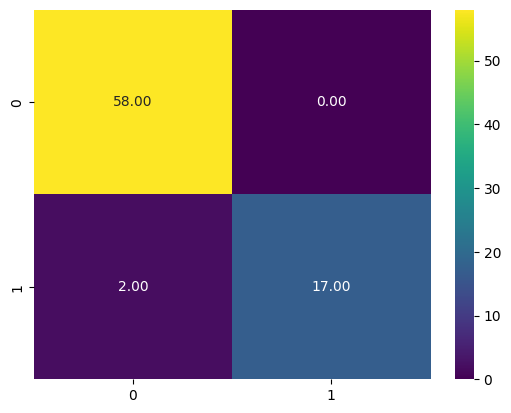

In [47]:
params={
    "n_estimators":[100,200,300],
    "criterion":['gini','entropy','logloss'],
    "max_depth":[3,5,7]
}

grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=10)

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print(f"best parameters are: {grid.best_params_}\n")
print("*"*70)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")
print("*"*70)

con_mat = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n {sns.heatmap(data=con_mat,annot=True,fmt='.2f',cmap='viridis')}")

best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

**********************************************************************
Accuracy: 98.7012987012987
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

**********************************************************************
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


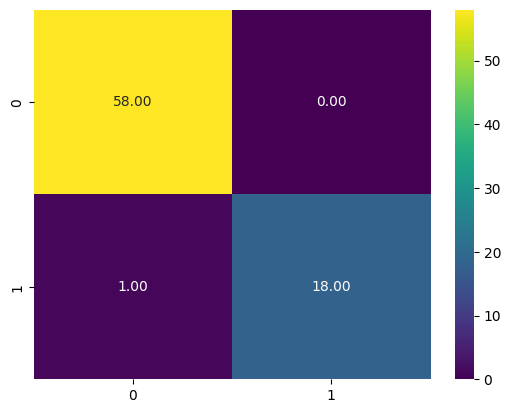

In [48]:
params={
    "n_estimators":[100,300,500],
    "max_depth":[3,5,7],
    "learning_rate":[0.1,0.01,0.001]
}

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=params,cv=10,scoring='accuracy')

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print(f"best parameters are: {grid.best_params_}\n")
print("*"*70)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")
print("*"*70)

con_mat = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n {sns.heatmap(data=con_mat,annot=True,fmt='.2f',cmap='viridis')}")

best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

**********************************************************************
Accuracy: 98.7012987012987
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

**********************************************************************
Confusion Matrix:
 Axes(0.125,0.11;0.62x0.77)


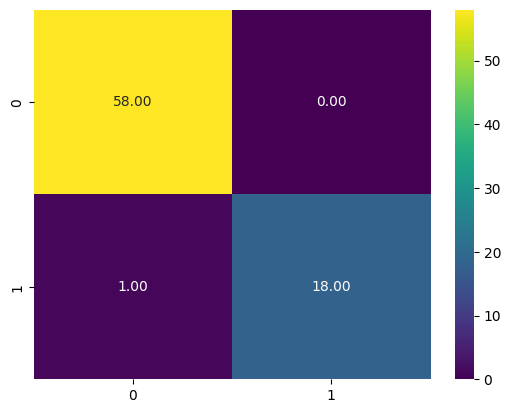

In [49]:
params={
    "n_estimators":[100,300,500],
    "max_depth":[3,5,7],
    "learning_rate":[0.1,0.01,0.001]
}

grid = GridSearchCV(estimator=XGBClassifier(),param_grid=params,cv=10,scoring='accuracy')

grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print(f"best parameters are: {grid.best_params_}\n")
print("*"*70)
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")
print("*"*70)

con_mat = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n {sns.heatmap(data=con_mat,annot=True,fmt='.2f',cmap='viridis')}")

# After using XGBClassifier we get the 99% accuracy...by tuning their parameters...

In [54]:
A = df.iloc[:,:-1]
A[:2]

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent


In [56]:
b = df.iloc[:,-1]
b[:2]

0    No
1    No
Name: Recurred, dtype: object

In [57]:
# lets split the data
x2_train,x2_test,y2_train,y2_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [58]:
x2_train[:2]

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
165,40,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent
321,62,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Structural Incomplete


In [61]:
trf1 = ColumnTransformer(transformers=[
    ("OneHot",OneHotEncoder(drop="first"),slice(1,9)),
    ("Ordinal",OrdinalEncoder(),slice(9,16))
],remainder='passthrough')

In [63]:
trf2 = ColumnTransformer(transformers=[
    ("StandardScaler",StandardScaler(),[0])
],remainder='passthrough')

In [64]:
trf3 = XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=500)

In [74]:
y2_train = encode.fit_transform(y2_train)
y2_test = encode.transform(y2_test)

In [65]:
Thyroid_pipe = make_pipeline(trf1,trf2,trf3)
Thyroid_pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  slice(1, 9, None)),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  slice(9, 16, None))])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(), [0])])),
                ('xgbclassifier',
                 XGBClassifie...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [75]:
Thyroid_pipe.fit(x2_train,y2_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  slice(1, 9, None)),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  slice(9, 16, None))])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(), [0])])),
                ('xgbclassifier',
                 XGBClassifie...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [76]:
# prediction:
y2_pred = Thyroid_pipe.predict(x2_test)
y2_pred[:5]

array([0, 0, 1, 1, 0])

In [77]:
y2_test[:5]

array([0, 0, 1, 1, 0])

In [81]:
# classificatio report:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In this case:

Objective = After initial Treatment how many patient will be free from thyroid cancer:

Here 58 patients are No Recurred and 19 patient has occrured Thyroid cancer

Out of 58 patient --> model predicts that for 58 pateint has cancer not affect so these statment lies under True Negative Category

So there we dont have False positives

Out of 19 patient --> model predicts that for 18 patient has cancer will occurs After initial Treatment so these will be --> True Positive

Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> False Negative

So, After initial treatment if the person who actually recurrance will occurs and model predicting that he will not occurs so here recall is dangerous





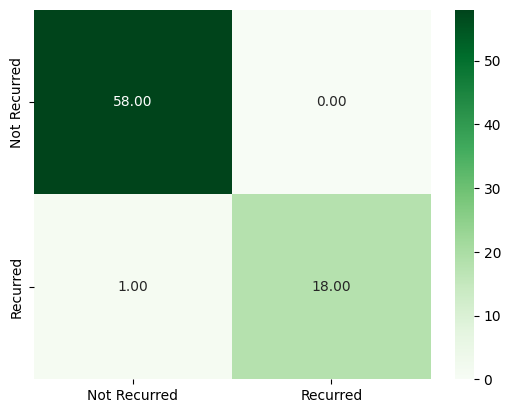

In [84]:
# lets see the confusion matrix
sns.heatmap(data=confusion_matrix(y2_test,y2_pred),annot=True,fmt=".2f",cmap='Greens',xticklabels=['Not Recurred','Recurred'],yticklabels=['Not Recurred','Recurred'])

print("In this case:\n")
print("Objective = After initial Treatment how many patient will be free from thyroid cancer:\n")
print("Here 58 patients are No Recurred and 19 patient has occrured Thyroid cancer\n")
print("Out of 58 patient --> model predicts that for 58 pateint has cancer not affect so these statment lies under True Negative Category\n")
print("So there we dont have False positives\n")
print("Out of 19 patient --> model predicts that for 18 patient has cancer will occurs After initial Treatment so these will be --> True Positive\n")
print("Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> False Negative\n")
print("So, After initial treatment if the person who actually recurrance will occurs and model predicting that he will not occurs so here recall is dangerous\n\n\n")

#lets dump the model..:

In [85]:
import pickle

pickle.dump(encode,open("Encode_Thyroid_Output.pkl","wb"))
pickle.dump(Thyroid_pipe,open("Thyroid_Pipe.pkl","wb"))

In [87]:
df['Recurred'] = encode.fit_transform(df[['Recurred']])

In [88]:
df.to_csv("Thyroid_Cancer_Data_Set.csv")